<h2><center>Week 7 - Assignment</center></h2>
<h3><center>Programming for Data Science 2025</center></h3>

Exercises for the topics covered in the seventh lecture.


The exercise will be marked as passed if you get **at least 15/20** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Annina Helmy + Markus Anwander = *HelmyAnnina_AnwanderMarkus.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For question about the lecture content or exam, contact: *annina.helmy@students.unibe.ch* with the subject: *Programming for Data Science 2025 - Lecture XY*.
For questions about the excercise/grading of excercises, contact: *thea.waldleben@students.unibe.ch* or *patricia.gribi@students.unibe.ch* with the subject: *Programming for Data Science 2025 - Excercise XY*.

**Deadline: 14:00, April 10, 2025.**

<h3 style="text-align:left;">Exercise 1 - World Weather<span style="float: right"></span></h3>

Re-create the two plots found in 'average_temperature_over_time.png’ and 'illumination_sunrise_sunset.png' using the data found in ’World Weather Repository.csv'

You do not have to make perfect replicas of the plots, but you should show that you are able to use the concepts shown in the lecture. If there are aspects of the plots you consider not to be reproducible given the information provided, comment this in your code. For instance, the size of dots may not be possible to reproduce exactly, and you will be awarded points for showing you are able to modify this parameter, where relevant, and pointing this out in your comments, rather than for reproducing the exact same dot size. The plots are made using matplotlib and seaborn, working on the dataframe.

Relevant concepts for exercise completion are:
- Saving
- Subplots (Object-oriented interface)
- Setting colors
- Adjusting axes limits
- Labels and legend
- Using seaborn together with pandas and matplotlib


Specific plot types requested:
- Line plot
- Violin plot
- Scatter plot

**Useful tips**:
There are multiple values per day. Add columns with the date (and the month) and average across those. 

**NB**: if you do not have seaborn installed, install it through *pip install seaborn*.


         date  avg_temp_celsius
0  2024-05-16         23.767196
1  2024-05-17         24.451648
2  2024-05-18         25.355610
3  2024-05-19         25.270103
4  2024-05-20         25.430769
5  2024-05-21         25.383077
6  2024-05-22         25.123077
7  2024-05-23         25.066154
8  2024-05-24         25.088718
9  2024-05-25         25.249744
New Zealand: 314 Einträge
Suriname: 318 Einträge
Ghana: 320 Einträge


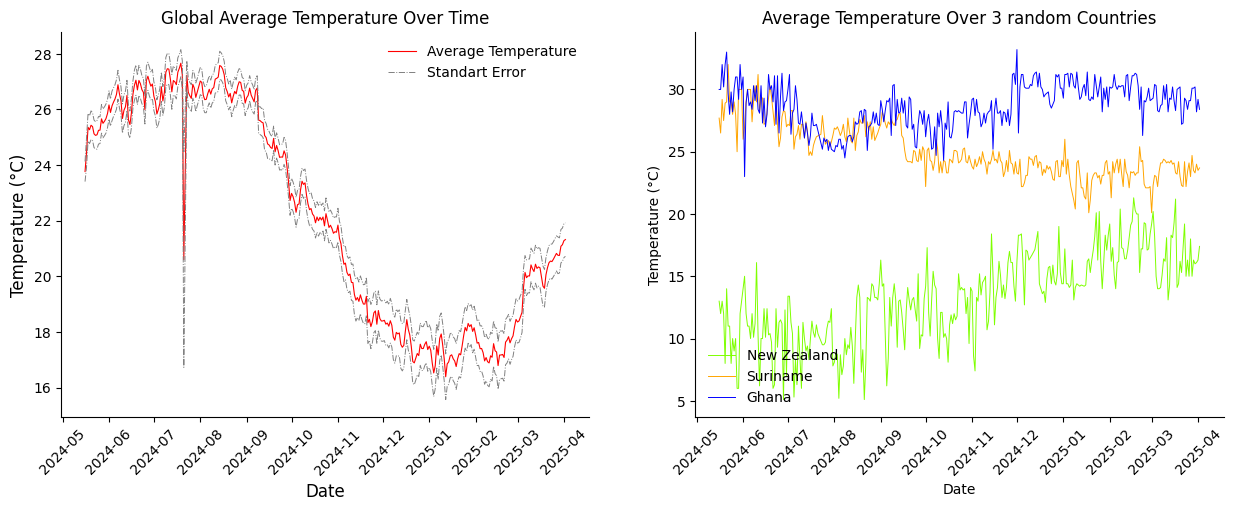

In [83]:
#Code for average_temperature_over_time


import matplotlib.pyplot as plt
import pandas as pd
import random

#first we read the data and group it by date
df = pd.read_csv("data/World Weather Repository.csv")
df["last_updated"] = pd.to_datetime(df["last_updated"])
df_grouped = df.groupby(df["last_updated"].dt.date)

#now we calculate the average temperature
df_ave_temp = df_grouped["temperature_celsius"].mean().reset_index()
df_ave_temp.columns = ["date", "avg_temp_celsius"]
print(df_ave_temp.head(10))

#plot the average temp
fig,ax=plt.subplots(1,2, figsize = (15,5))
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].plot(df_ave_temp["date"], df_ave_temp["avg_temp_celsius"], linestyle = '-', color = 'r', label = 'Average Temperature',linewidth = 0.8)


#some comsetic
ax[0].set_title("Global Average Temperature Over Time")
ax[0].set_xlabel("Date",size=12) #not sure about the size
ax[0].set_ylabel("Temperature (°C)",size=12)
ax[0].tick_params(axis='x', rotation=45)

#now we add the standart error:
df_st_err = df_grouped["temperature_celsius"].sem().reset_index()
df_st_err.columns = ["date", "st_err"]

#plot upper error
ax[0].plot(df_st_err["date"], df_st_err["st_err"]+df_ave_temp["avg_temp_celsius"],linestyle = '-.', color='gray', label = 'Standart Error', linewidth = 0.7)
#plot lower error
ax[0].plot(df_st_err["date"], df_ave_temp["avg_temp_celsius"]-df_st_err["st_err"],linestyle = '-.', color='gray',linewidth = 0.7)

#legend
ax[0].legend(
    loc='upper right',
    frameon = False
)



#second subplot
#it is not totally clear for me if I should choose 3 countries at random, as this seems to be the idea of the graph, or just take the same 3 countries as in the png
#I will do the first


#choose 3 countries at random
countries = df["country"].dropna().unique()
rand_countries = random.sample(list(countries),3)

#ggroup by date and country
df_grouped_ii = df.groupby([df["last_updated"].dt.date, "country"])["temperature_celsius"].mean().reset_index()
df_grouped_ii.columns = ["date", "country", "ave_temp_celsius"]

#spines
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

#iterate over 3 countries, plot ave_temp, change color
counter = 0
character = 'chartreuse'
for country in rand_countries:
    #somehow there seems to be a little bug: some countries only have very few entries, thats why it sometimes seems like one of the countries is not ploted
    count = df_grouped_ii[df_grouped_ii["country"] == country].shape[0]
    print(f"{country}: {count} Einträge")


    df_land = df_grouped_ii[df_grouped_ii["country"] == country]
    if(counter == 1):
        character = 'orange'
    elif(counter == 2):
        character = 'blue' #not exactly blue in the picture, but close enough
    ax[1].plot(df_land["date"],df_land["ave_temp_celsius"], color = character, linestyle = '-',label = country, linewidth= 0.7)
    counter += 1

#cosmetics
ax[1].set_title("Average Temperature Over 3 random Countries")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Temperature (°C)")
ax[1].tick_params(axis='x', rotation=45)

#legend
ax[1].legend(
    loc = 'lower left', 
    frameon = False
)










fig.savefig('ave_temp.png')






Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


C:\Users\wolfi\AppData\Local\Temp\ipykernel_1960\3528477313.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\wolfi\AppData\Local\Temp\ipykernel_1960\3528477313.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iceland['date'] = pd.to_datetime(df_iceland['last_updated'])
C:\Users\wolfi\AppData\Local\Temp\ipykernel_1960\3528477313.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

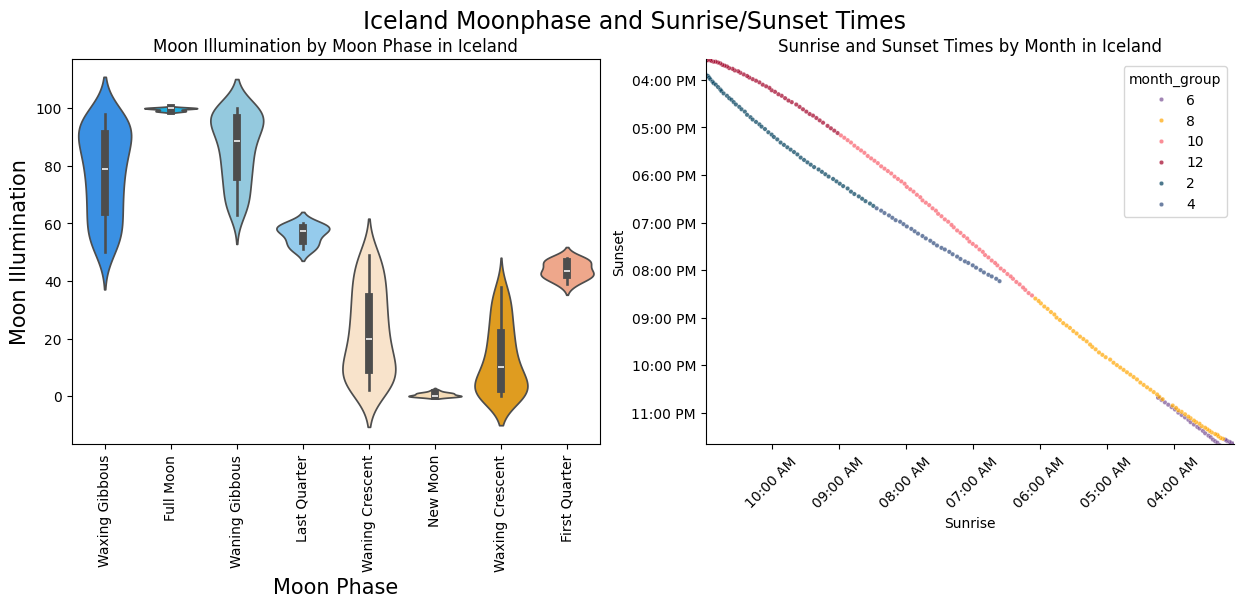

In [ ]:
#Code for illumination_sunrise_sunset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

#read Data, only need iceland
df = pd.read_csv("data/World Weather Repository.csv")
print(df.columns)
df_iceland = df[df["country"] == "Iceland"]

fig,ax=plt.subplots(1,2, figsize = (15,5))

#cosmetics
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

#for color dict
colors=['dodgerblue','deepskyblue','skyblue','lightskyblue','bisque','navajowhite','orange','lightsalmon'] #not sure if those are the exact colors
phases=df["moon_phase"].unique()

phase_color = dict(zip(phases,colors))

#actually plot with specific params
sns.violinplot(
 data=df_iceland,
 x="moon_phase",
 y="moon_illumination",
 inner="box",
 palette=phase_color,
 ax = ax[0]

)

#cosmetics
ax[0].set_title("Moon Illumination by Moon Phase in Iceland")
ax[0].set_xlabel("Moon Phase", size=15)
ax[0].set_ylabel("Moon Illumination", size=15)
ax[0].tick_params(axis='x',rotation=90)

#subplot 2
#create date_timeobjects to extract the month, (month will be used later)
df_iceland['date'] = pd.to_datetime(df_iceland['last_updated'])
df_iceland['month'] = df_iceland['date'].dt.month

# need datetime objects for the axis
df_iceland['sunrise_dt'] = pd.to_datetime(df_iceland['sunrise'], format='%I:%M %p')
df_iceland['sunset_dt'] = pd.to_datetime(df_iceland['sunset'], format='%I:%M %p')


ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)



# time-format (from internet)
time_format = mdates.DateFormatter('%I:%M %p')

# apply time format
ax[1].xaxis.set_major_formatter(time_format)
ax[1].yaxis.set_major_formatter(time_format)


ax[1].tick_params(axis='x', rotation=45)
# limit x
x_min = datetime.strptime("10:59 AM", "%I:%M %p")
x_max = datetime.strptime("03:06 AM", "%I:%M %p")

# limit y
y_min = datetime.strptime("11:40 PM", "%I:%M %p")
y_max = datetime.strptime("03:34 PM", "%I:%M %p")

# Set limits for the axis
ax[1].set_xlim([x_min, x_max])
ax[1].set_ylim([y_min, y_max])



def map_month_to_group(month):
    if month in [1, 2]:
        return "2"
    elif month in [3, 4]:
        return "4"
    elif month in [5, 6]:
        return "6"
    elif month in [7, 8]:
        return "8"
    elif month in [9, 10]:
        return "10"
    else:
        return "12"

#create a dict for the month -> color mapping    
df_iceland["month_group"] = df_iceland["month"].apply(map_month_to_group)

custom_palette = {
    "2": "#003f5c",    # Dunkelblau
    "4": "#2f4b7c",    # Hellblau
    "6": "#7a5195",    # Violett/Grünlich
    "8": "#ffa600",    # Gelb
    "10": "#f95d6a",    # Orange
    "12": "#a10026"     # Dunkelrot
}

sns.scatterplot(
    data=df_iceland,
    x='sunrise_dt',  
    y='sunset_dt',   
    hue='month_group',
    palette=custom_palette,
    ax=ax[1],
    s=10,
    alpha=0.7,
    legend='full'
)

#cosmetics
ax[1].set_title("Sunrise and Sunset Times by Month in Iceland")
ax[1].set_xlabel("Sunrise")
ax[1].set_ylabel("Sunset")

fig.suptitle("Iceland Moonphase and Sunrise/Sunset Times", fontsize=17)
fig.savefig('Moon.png')

<h3 style="text-align:left;">Exercise 2 - Co2 <span style="float: right"></span></h3>

Re-create the plots found in ’plots.png’ using the data found in ’owid-co2-data-reduced.csv’ (source: https://github.com/owid/co2-data).

You do not have to make perfect replicas of the plots, but you should show that you are able to use the concepts shown in the lecture. If there are aspects of the plots you consider not to be reproducible given the information provided, comment this in your code. For instance, the size of dots may not be possible to reproduce exactly, and you will be awarded points for showing you are able to modify this parameter, where relevant, and pointing this out in your comments, rather than for reproducing the exact same dot size. The plots are made using matplotlib and seaborn, working on the dataframe.

Relevant concepts for exercise completion are:
- Saving
- Subplots (Object-oriented interface)
- Setting colors
- Adjusting axes limits
- Labels and legend
- Using seaborn together with pandas and matplotlib


Specific plot types requested:
- Line plot
- Violin plot
- Scatter plot

**Useful tips**:
- to select only the actual countries, check those that have an *iso_code* in the dataframe.
- the values "per capita" are obtained by normalizing to the population.
- the "percentage" values are obtained by normalizing on the total emissions.

**NB**: if you do not have seaborn installed, install it through *pip install seaborn*.